# Formula 1

## Table of Contents
1. [Import Libraries](#import-libraries)
2. [Load Data from Ergast API](#load-data)
    - [Season List](#season-list)

### 1. Import Libraries <a class="anchor" id="import-libraries"></a>

In [12]:
from datetime import datetime
import requests
import json

import matplotlib.pyplot as plt

### 2. Load Data from Ergast API <a class="anchor" id="load-data"></a>

#### Season List <a class="anchor" id="season-list"></a>
http://ergast.com/mrd/methods/seasons/ 

In [15]:
current_year = datetime.today().year
seasons = list(range(1950, current_year+1))

season_list = []
total_races_list = []

# loop over all seasons
for year in seasons:
    response_API = requests.get('http://ergast.com/api/f1/{}.json'.format(year))
    data = response_API.text
    parse_json = json.loads(data)
    
    season = parse_json['MRData']['RaceTable']['season']
    season_list.append(season)
    
    total_races = parse_json['MRData']['total']
    total_races_list.append(total_races)
    #print('Season {} contains {} races in total.'.format(season, total_races))

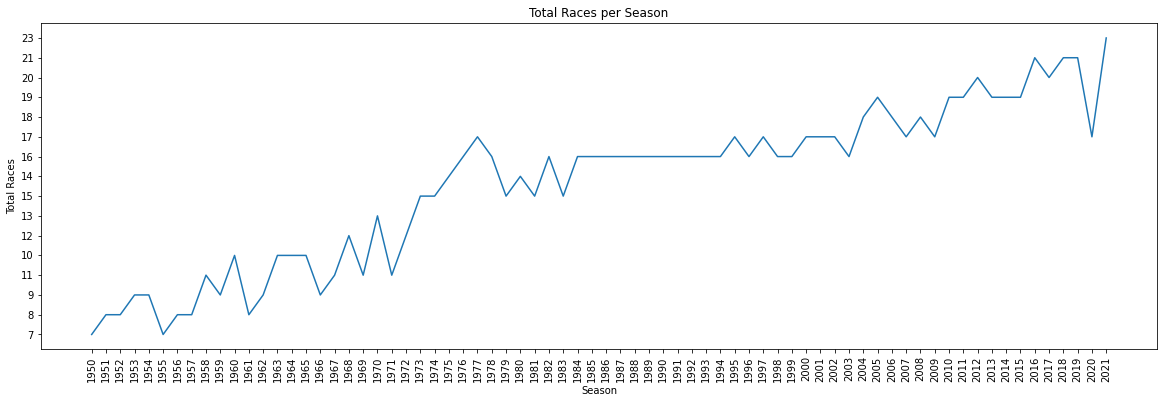

In [16]:
plt.figure(figsize=(20, 6))
plt.title('Total Races per Season')
plt.xlabel('Season')
plt.ylabel('Total Races')
plt.xticks(rotation=90)
plt.plot(season_list, total_races_list)
plt.show()